## Import Statements

In [11]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
def cluster_and_visualize(filepath, n_clusters=6):
    # Load data
    df = pd.read_csv(filepath)

    # Select feature columns
    feature_cols = [col for col in df.columns if col.startswith("SVD_") or col.startswith("PC")]
    X = df[feature_cols].values

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    df['KMeans_Cluster'] = kmeans_labels

    # Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg.fit_predict(X_scaled)
    df['Agglomerative_Cluster'] = agg_labels

    # Visualize clustering in 2D
    if X_scaled.shape[1] > 2:
        pca = PCA(n_components=2)
        components_2d = pca.fit_transform(X_scaled)
        df['PC1'] = components_2d[:, 0]
        df['PC2'] = components_2d[:, 1]
    else:
        df['PC1'] = X_scaled[:, 0]
        df['PC2'] = X_scaled[:, 1]

    plt.figure(figsize=(12, 5))

    # Pretty title for plots
    pretty_title = filepath.split("/")[-1].replace(".csv", "").replace("_", " ").title()

    # Plot KMeans clustering
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='KMeans_Cluster', palette='tab10', s=70, style="Sector")
    plt.title(f'KMeans Clustering: {pretty_title}')

    # Plot Agglomerative clustering
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='Agglomerative_Cluster', palette='tab10', s=70, style="Sector")
    plt.title(f'Agglomerative Clustering: {pretty_title}')

    plt.tight_layout()
    plt.show()

    # Silhouette scores
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
    agg_silhouette = silhouette_score(X_scaled, agg_labels)
    print(f"{filepath}:\n  KMeans Silhouette: {kmeans_silhouette:.3f}\n  Agglomerative Silhouette: {agg_silhouette:.3f}")

    # Confusion matrices (heatmaps)
    kmeans_ct = pd.crosstab(df['KMeans_Cluster'], df['Sector'])
    agg_ct = pd.crosstab(df['Agglomerative_Cluster'], df['Sector'])

    plt.figure(figsize=(14, 5))

    # KMeans heatmap
    plt.subplot(1, 2, 1)
    sns.heatmap(kmeans_ct, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
    plt.title("KMeans Cluster vs Sector")
    plt.xlabel("Sector")
    plt.xticks(rotation=45)
    plt.ylabel("KMeans Cluster")

    # Agglomerative heatmap
    plt.subplot(1, 2, 2)
    sns.heatmap(agg_ct, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
    plt.title("Agglomerative Cluster vs Sector")
    plt.xlabel("Sector")
    plt.xticks(rotation=45)
    plt.ylabel("Agglomerative Cluster")

    plt.tight_layout()
    plt.show()


## Clustering 60 Components

### Comments:
- Seems KMeans creates more well-separated clusters than agglomerative for 60 components
- Agglomerative silhouette scores are all negative, which indicates no meaningful cluster separation. Some points are closer to other clusters rather than their own cluster
- SVD/Truncated SVD created the most well-separated clusters, but were terrible overall, which can be seen with the generally low silhouette scores
- Heatmaps indicate clustering leads to 1 or 2 general groupings, which is not good
- Agglomerative heatmaps also show that tech and semiconductors are generally getting clustered with separation, which is good

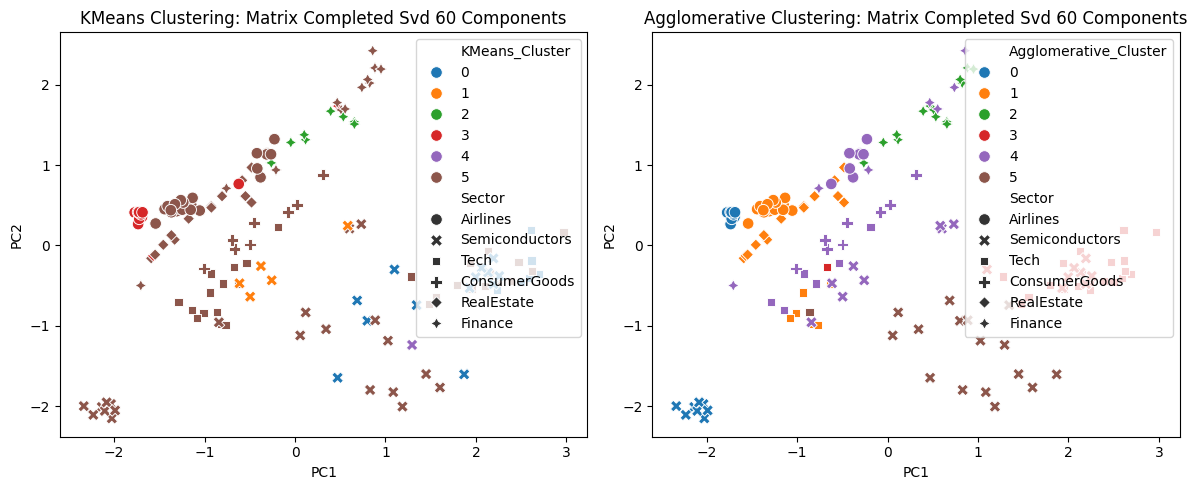

2000-words-kept-data/matrix_completed_svd_60_components.csv:
  KMeans Silhouette: -0.040
  Agglomerative Silhouette: -0.040


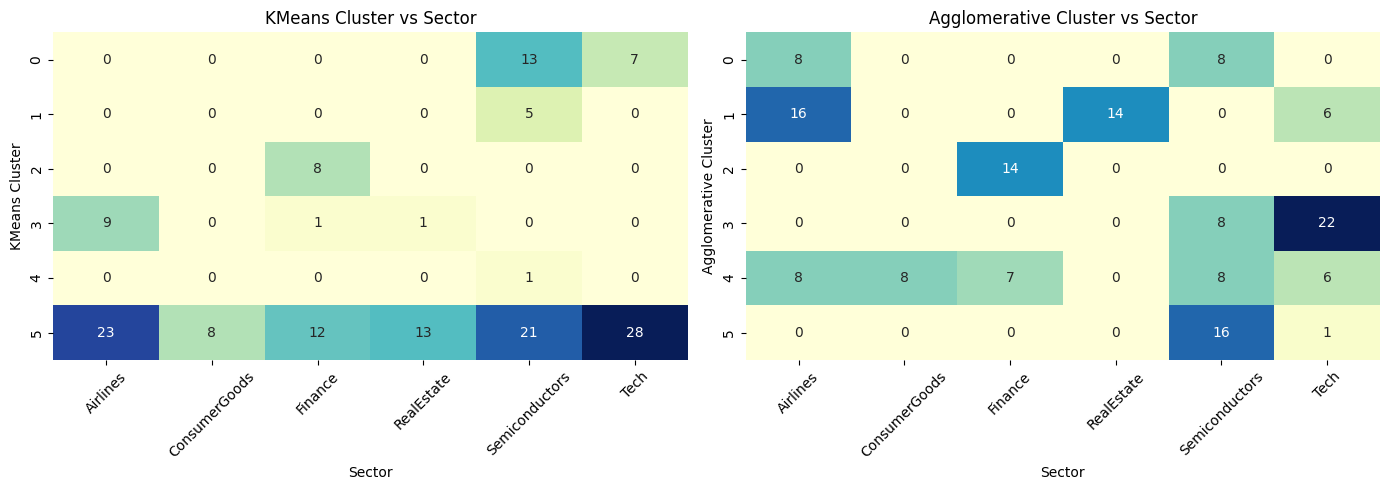

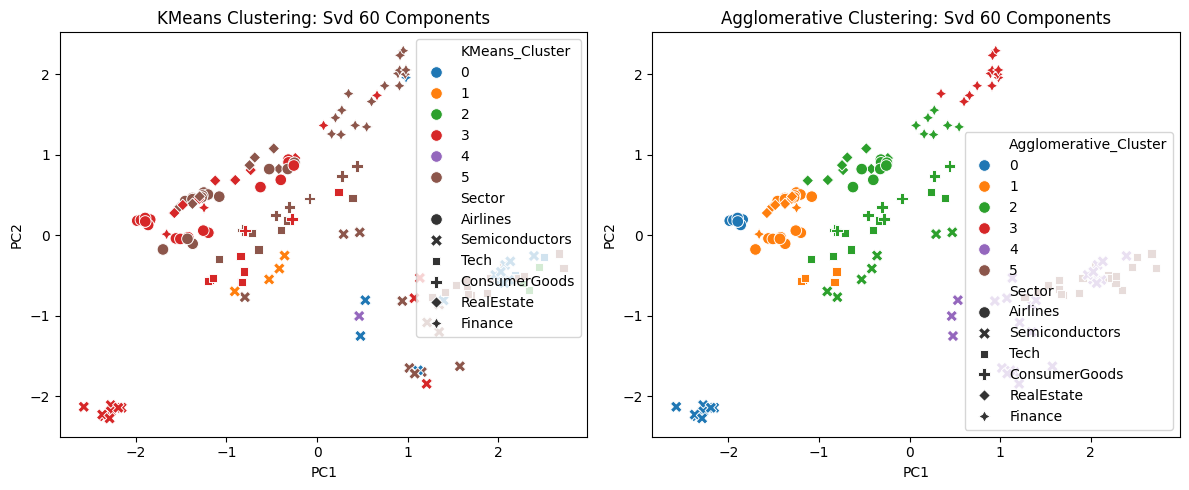

2000-words-kept-data/svd_60_components.csv:
  KMeans Silhouette: 0.024
  Agglomerative Silhouette: -0.035


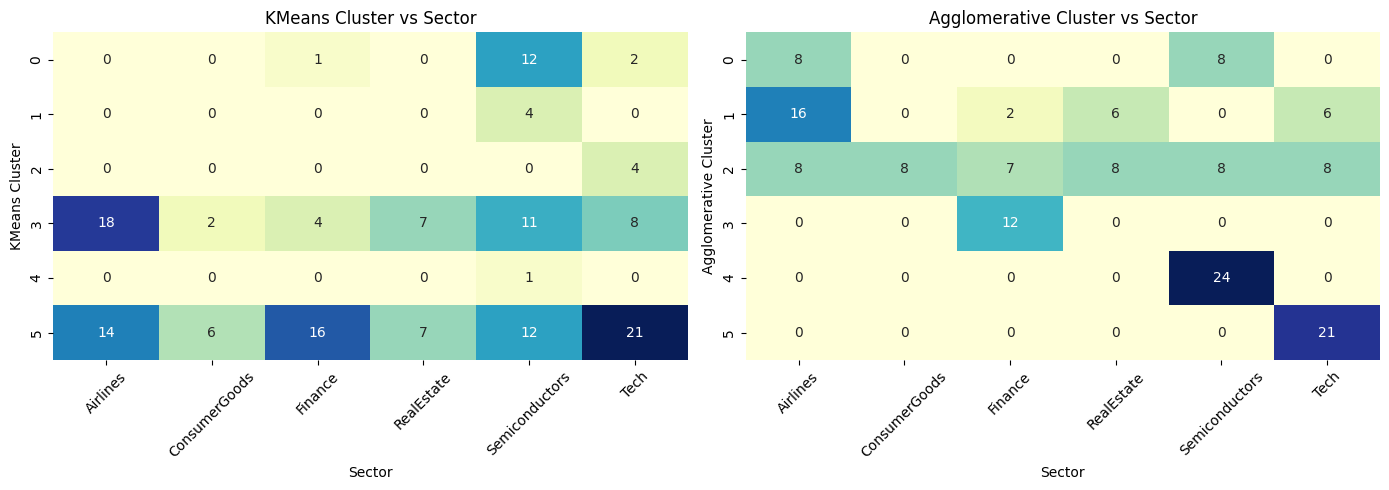

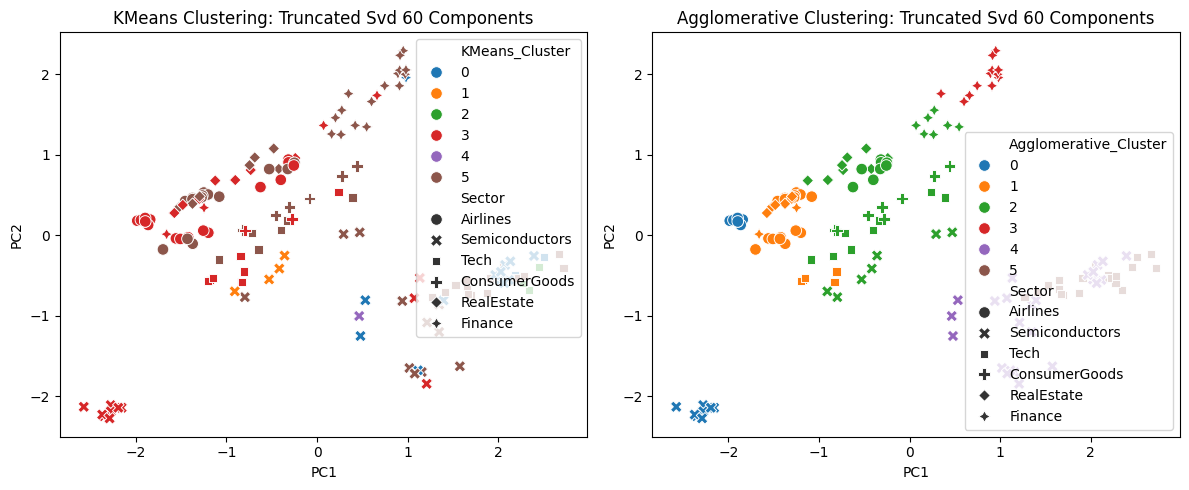

2000-words-kept-data/truncated_svd_60_components.csv:
  KMeans Silhouette: 0.024
  Agglomerative Silhouette: -0.035


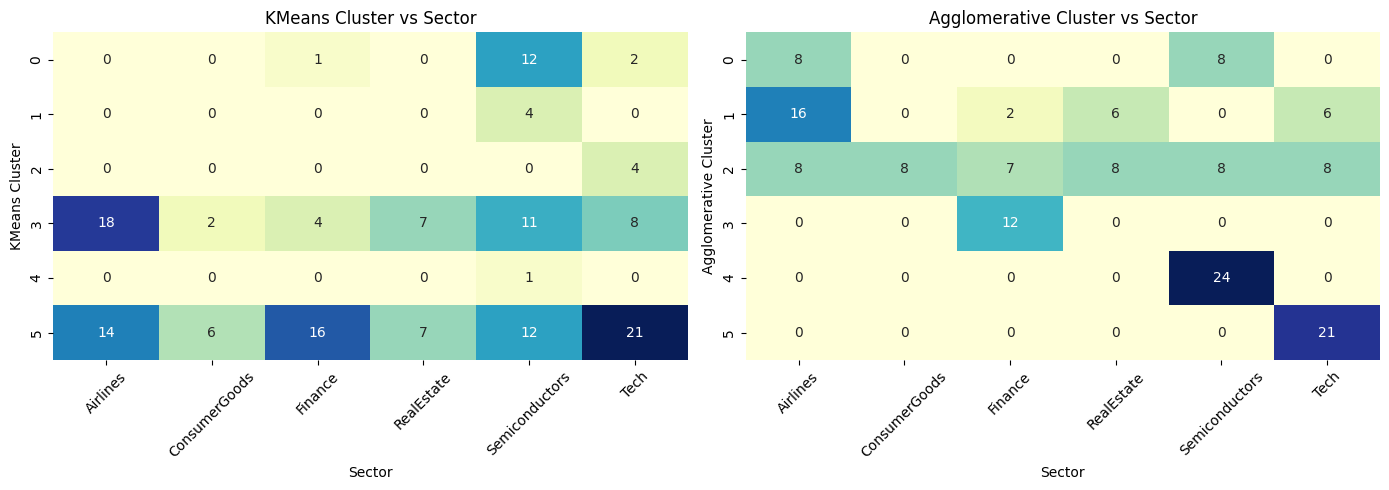

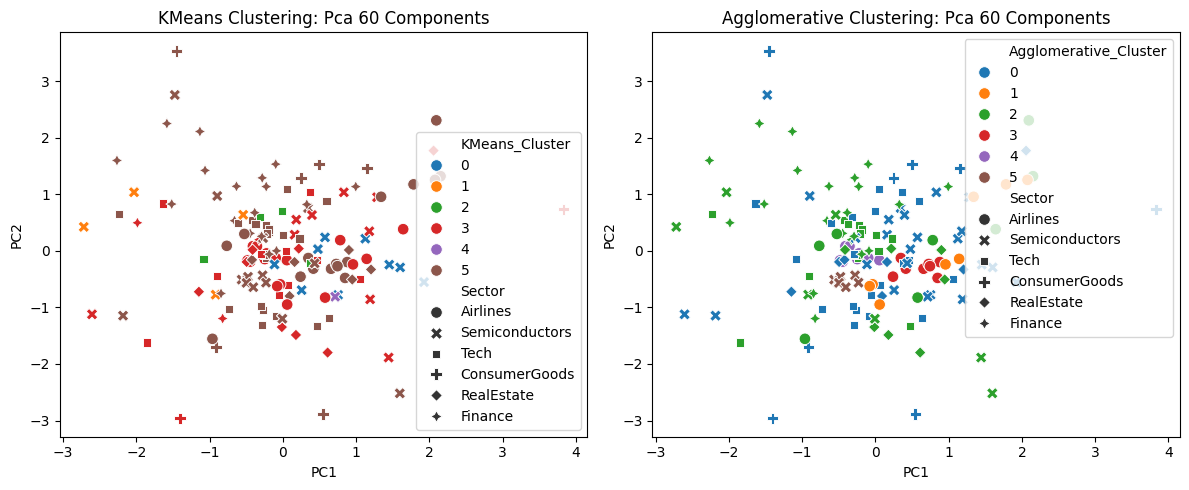

2000-words-kept-data/pca_60_components.csv:
  KMeans Silhouette: 0.009
  Agglomerative Silhouette: -0.049


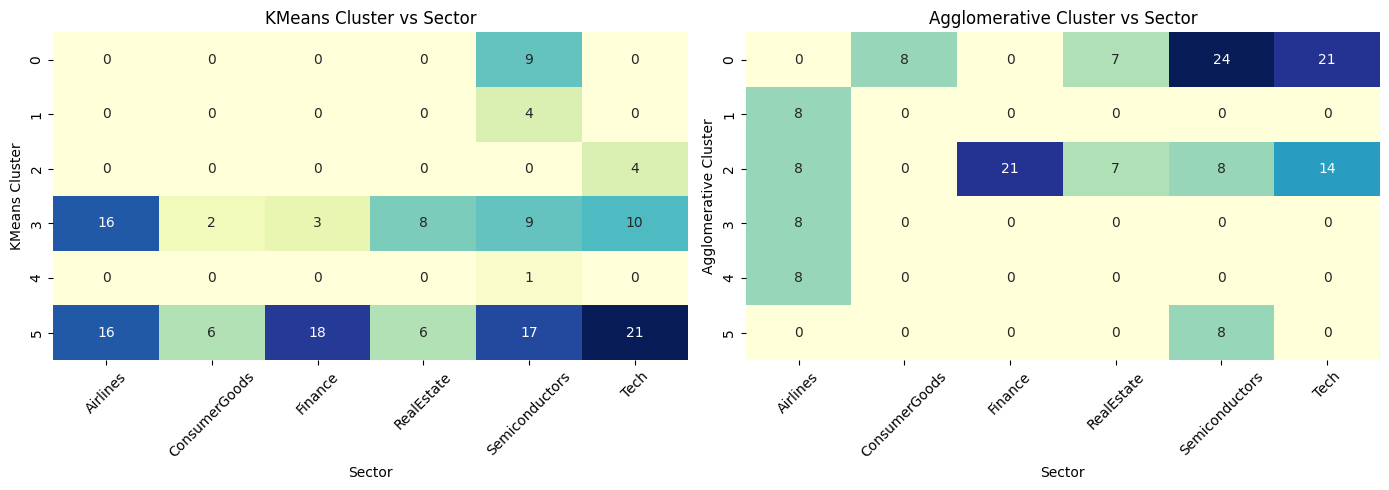

In [17]:
files = [
    "2000-words-kept-data/matrix_completed_svd_60_components.csv",
    "2000-words-kept-data/svd_60_components.csv",
    "2000-words-kept-data/truncated_svd_60_components.csv",
    "2000-words-kept-data/pca_60_components.csv"
]

for file in files:
    cluster_and_visualize(file)

## Clustering 30 Components

### Comments:
- Much better compared to 60 components
- Seems agglomerative clustering did better overall than KMeans in terms of silhouette score
- Agglomerative clustering still has some irrelevant or overlapping features, but did much better than the clustering with 60 components
- Again, SVD/Truncated SVD seems to have created well-separated clusters
- Heatmaps show that finance was able to get distinguished into its own cluster which is good
- Heatmaps also show some overlap between tech and semiconductors which also makes sense since they are related

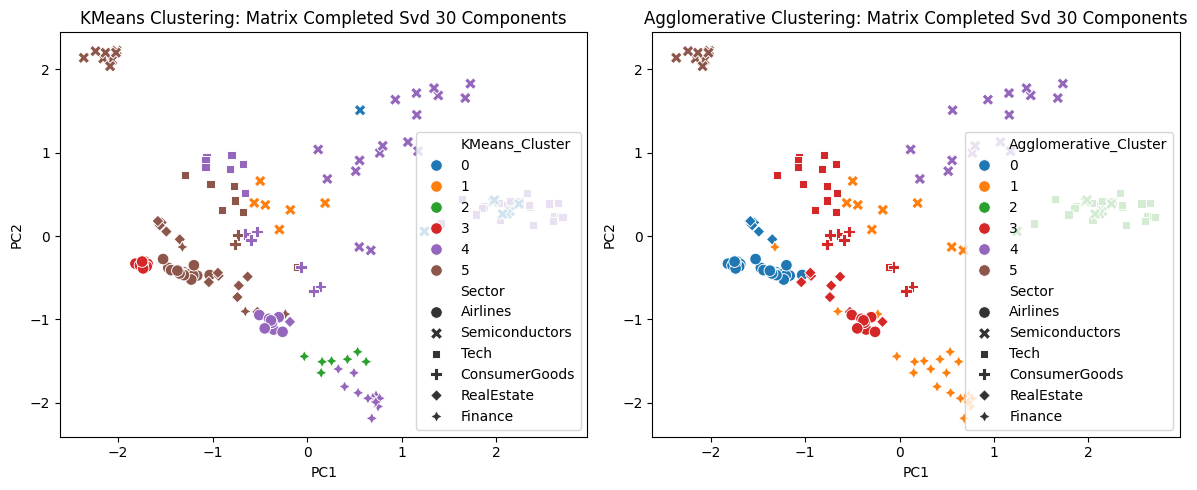

2000-words-kept-data/matrix_completed_svd_30_components.csv:
  KMeans Silhouette: 0.096
  Agglomerative Silhouette: 0.110


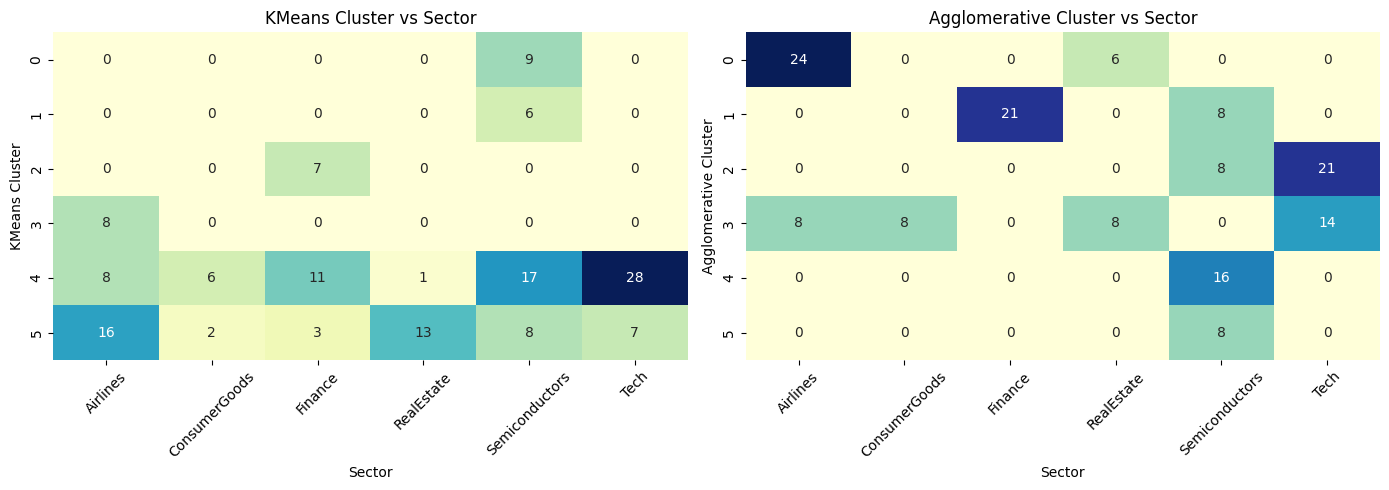

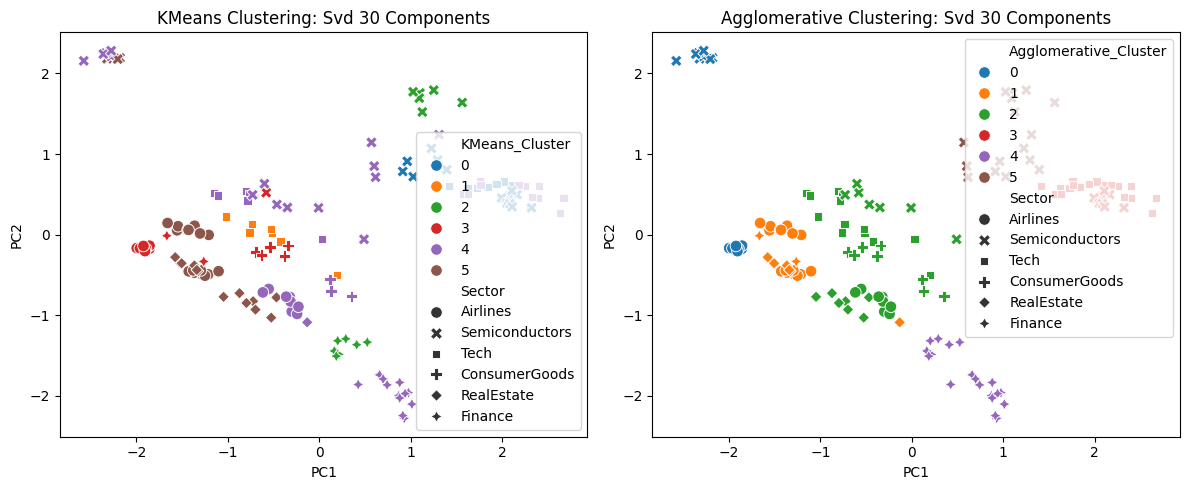

2000-words-kept-data/svd_30_components.csv:
  KMeans Silhouette: 0.117
  Agglomerative Silhouette: 0.132


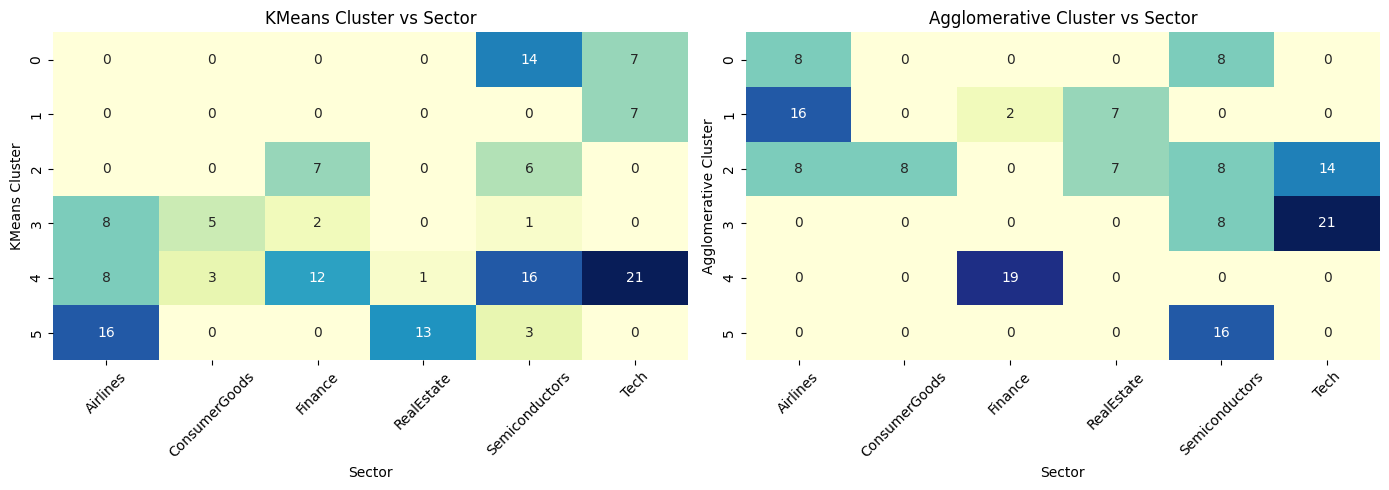

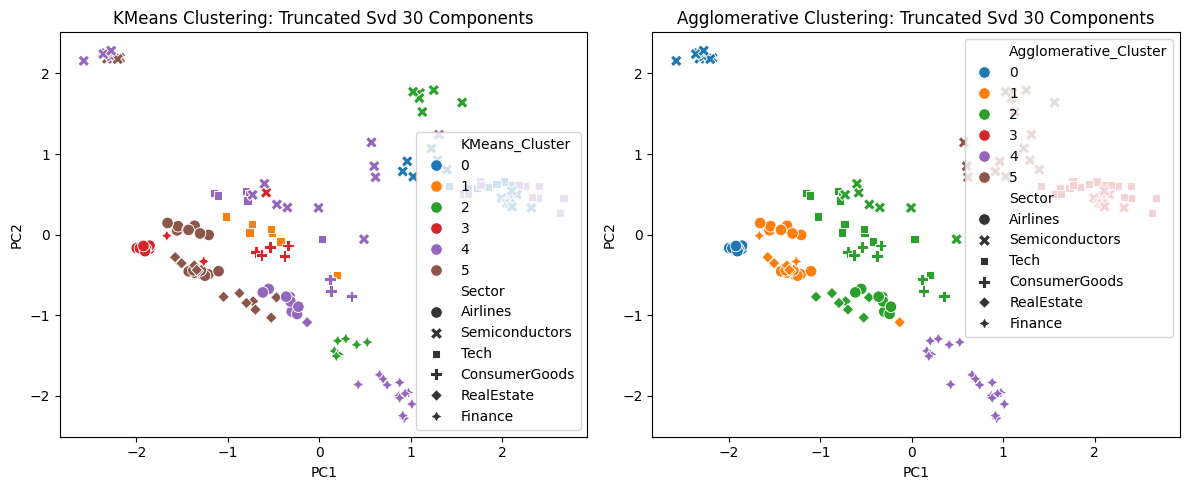

2000-words-kept-data/truncated_svd_30_components.csv:
  KMeans Silhouette: 0.117
  Agglomerative Silhouette: 0.132


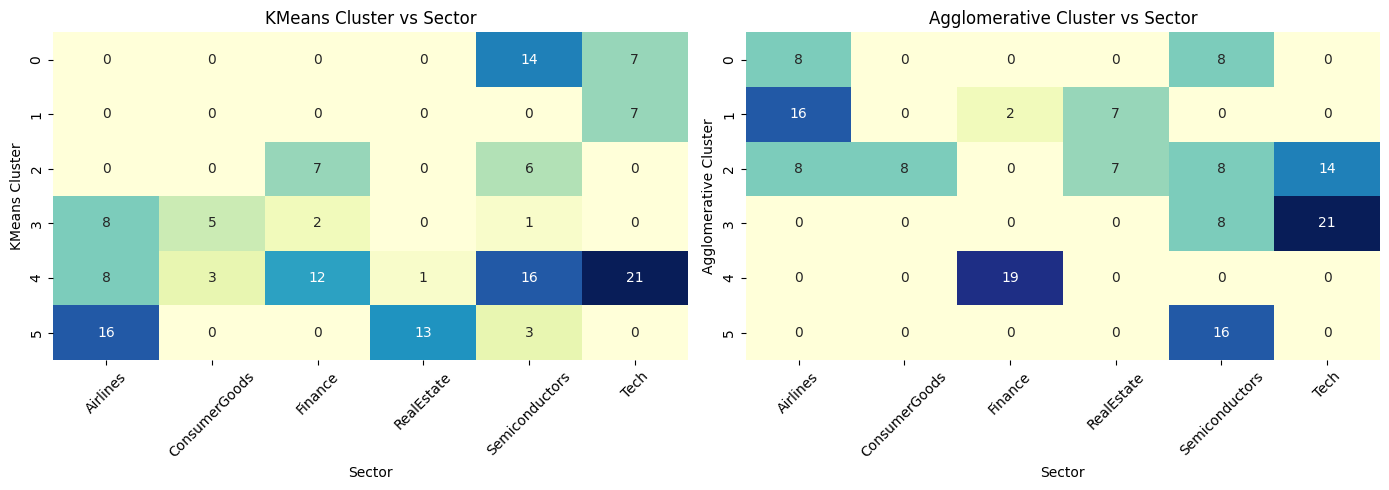

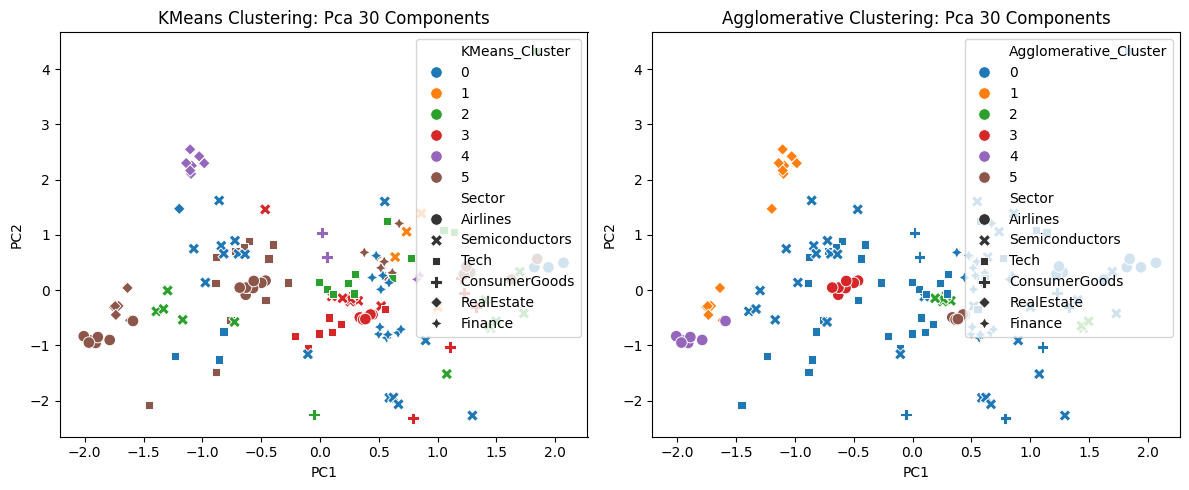

2000-words-kept-data/pca_30_components.csv:
  KMeans Silhouette: 0.096
  Agglomerative Silhouette: 0.116


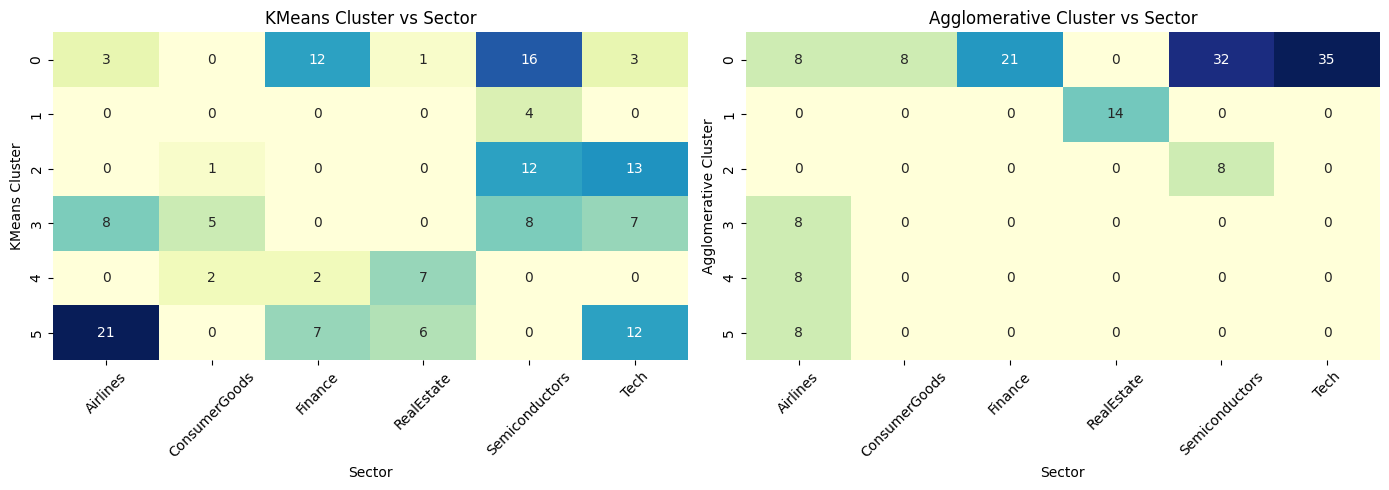

In [18]:
files = [
    "2000-words-kept-data/matrix_completed_svd_30_components.csv",
    "2000-words-kept-data/svd_30_components.csv",
    "2000-words-kept-data/truncated_svd_30_components.csv",
    "2000-words-kept-data/pca_30_components.csv"
]

for file in files:
    cluster_and_visualize(file)

## Clustering for 20 Components

### Comments:
- Much better than 30 or 60 components
- Both KMeans and Agglomerative clusterings were able to find more clear and structure clusters
- PCA with 20 components had the best clustering
- The silhouette scores can be misleading because the heatmaps tell another story. If we look at the two heatmaps for PCA, we can see the KMeans did have a decent silhouette score, but one cluster dominated and did not allow for meaningful separation, while the Agglomerative had more distributed clusterings. Agglomerative did also have some overlaps (Semiconductors appeared in 3 clusters).
- Grouping of tech and semiconductors makes sense since those are closely related

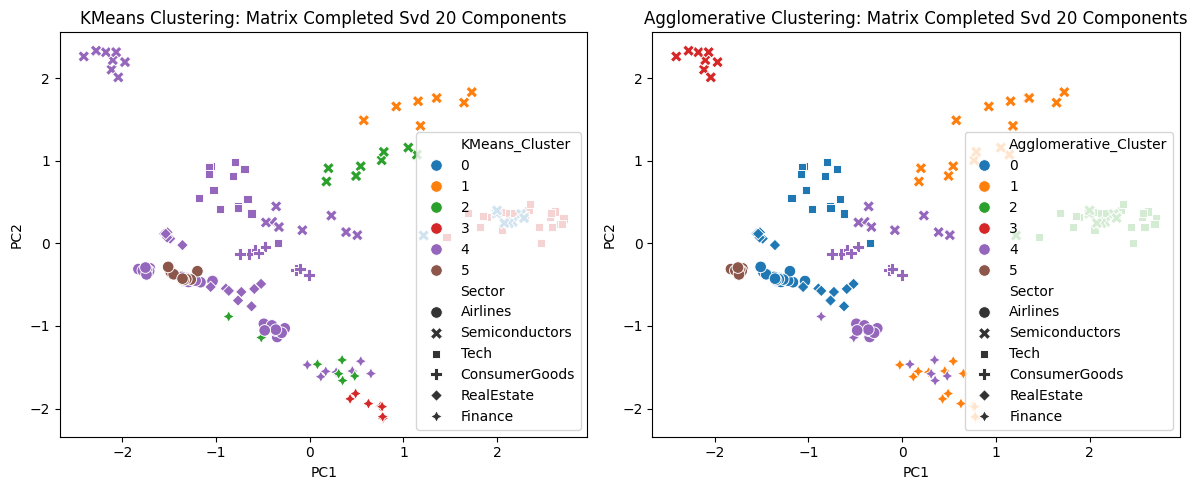

2000-words-kept-data/matrix_completed_svd_20_components.csv:
  KMeans Silhouette: 0.231
  Agglomerative Silhouette: 0.243


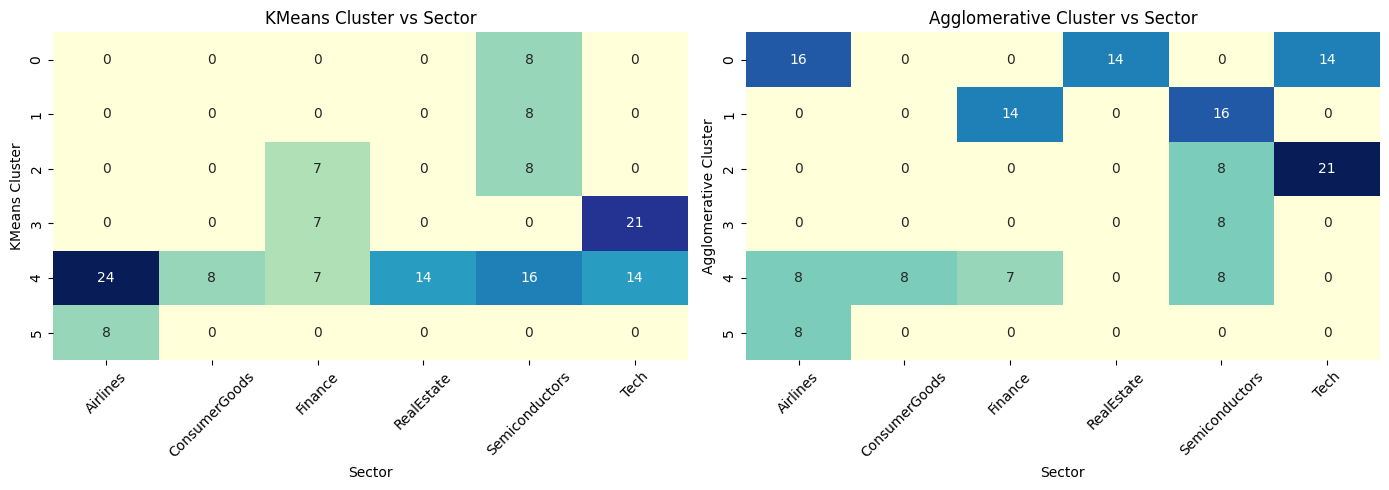

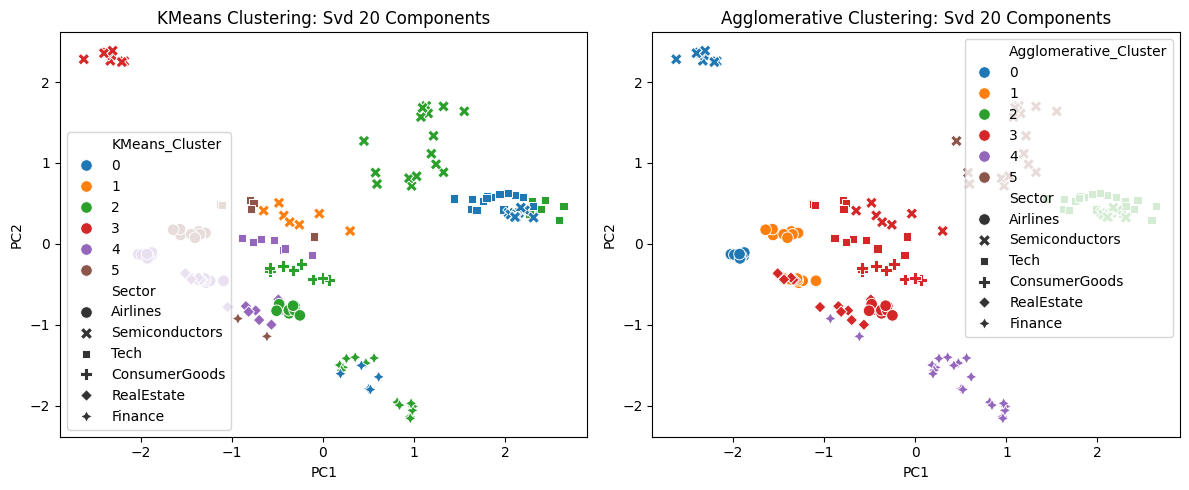

2000-words-kept-data/svd_20_components.csv:
  KMeans Silhouette: 0.230
  Agglomerative Silhouette: 0.240


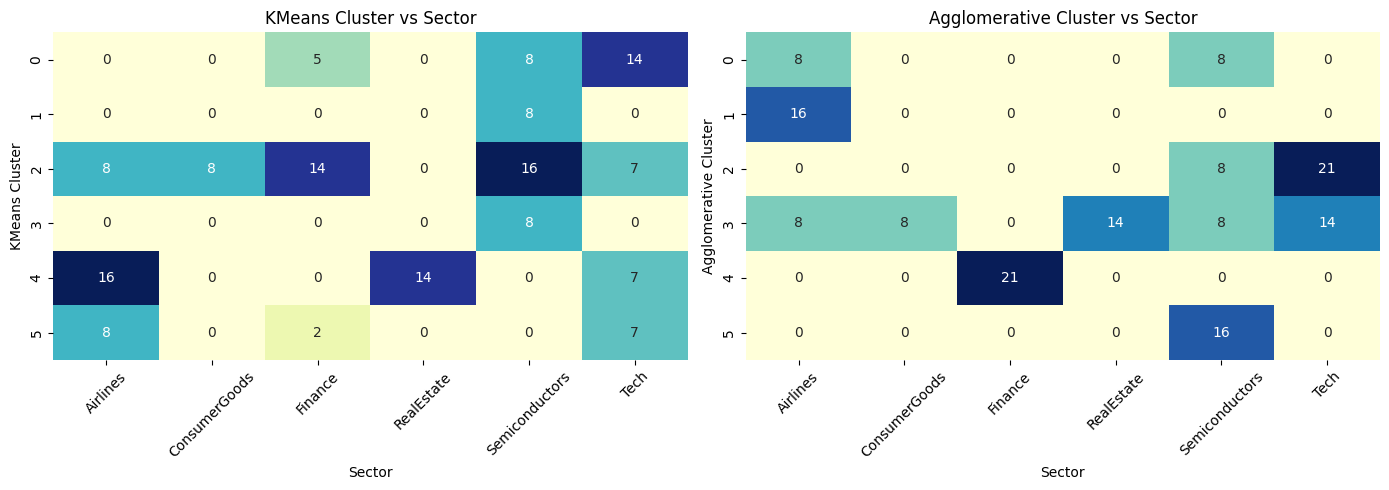

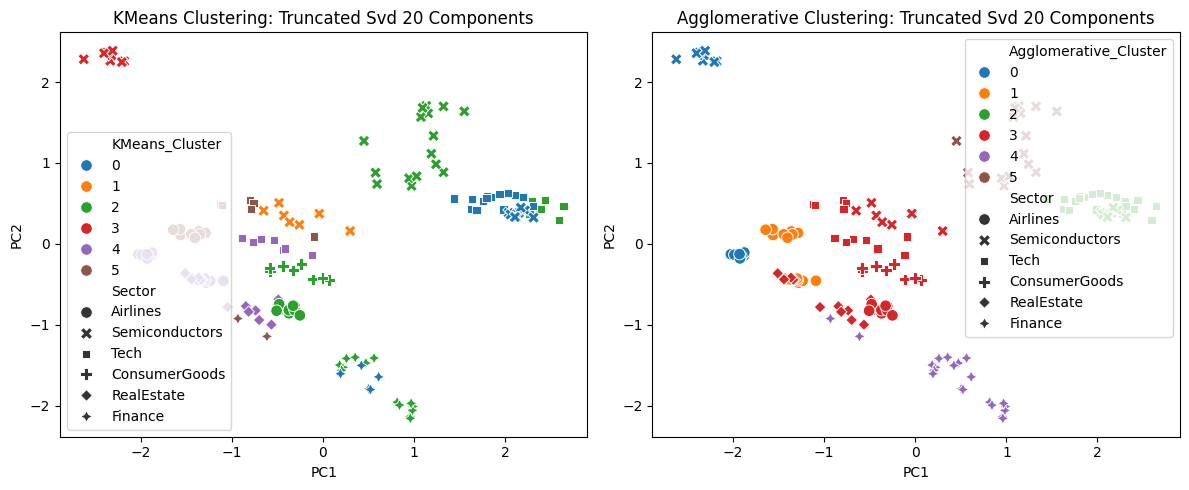

2000-words-kept-data/truncated_svd_20_components.csv:
  KMeans Silhouette: 0.230
  Agglomerative Silhouette: 0.240


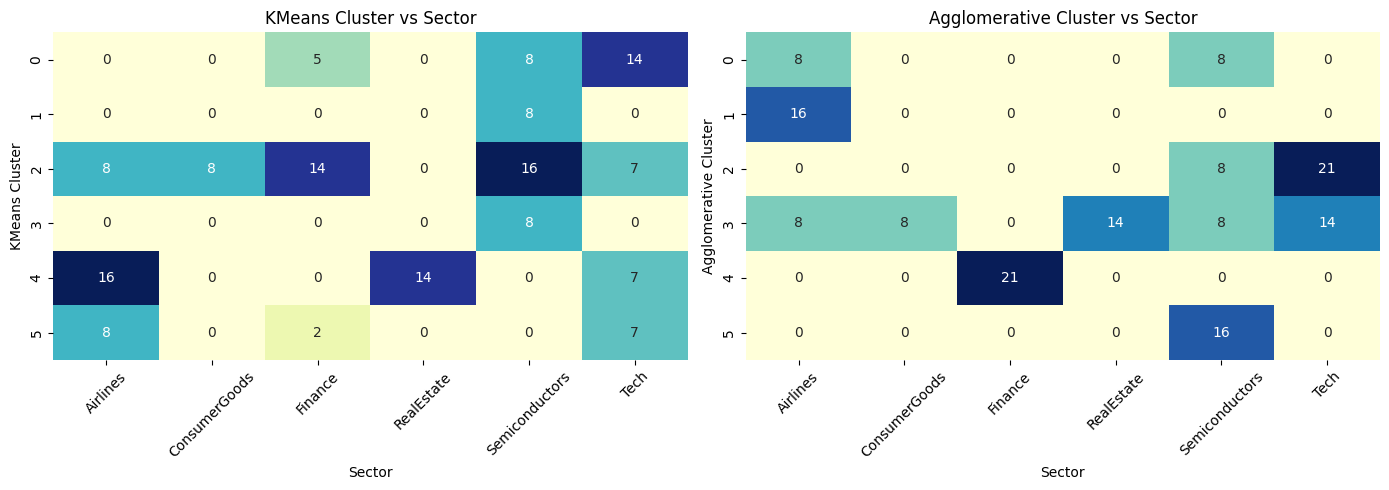

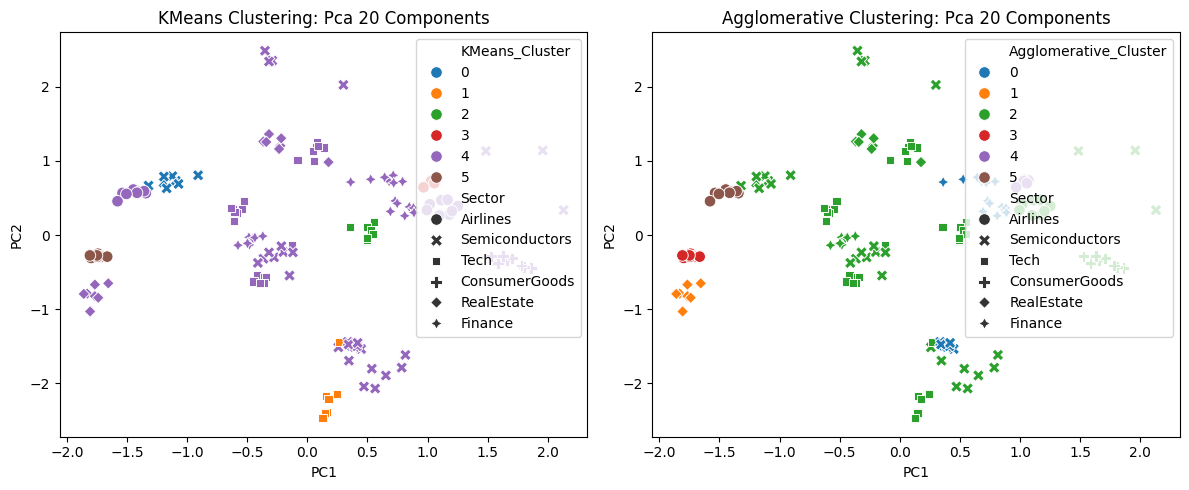

2000-words-kept-data/pca_20_components.csv:
  KMeans Silhouette: 0.241
  Agglomerative Silhouette: 0.244


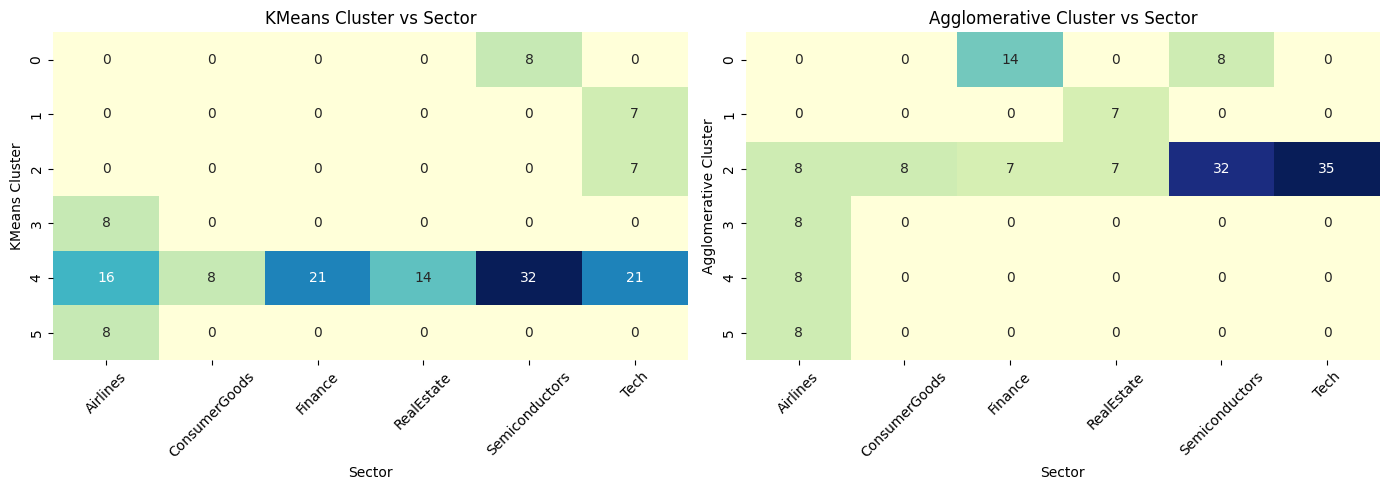

In [19]:
files = [
    "2000-words-kept-data/matrix_completed_svd_20_components.csv",
    "2000-words-kept-data/svd_20_components.csv",
    "2000-words-kept-data/truncated_svd_20_components.csv",
    "2000-words-kept-data/pca_20_components.csv"
]

for file in files:
    cluster_and_visualize(file)

### Takeaways:
- The extra 10-15% variance explained/captured between 30 and 60 components hurts clustering quality likely due to non-informative patterns or domain-generic language
- Lower dimensional embedding yielded clearer cluster structures. Just 20 components was able to better emphasize broad thematic distinctions (like sector-level differences), which is what we wanted